<a href="https://colab.research.google.com/github/campeone-pixel/soccer_database/blob/master/ProyectoDS_ParteI_%2BCannoni%2BPoses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import sqlite3
import pandas as pd
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# df_games = pd.read_csv("games.csv")
# df_teams = pd.read_csv("teams.csv")
# df_teamstats = pd.read_csv("teamstats.csv")
# df_leagues = pd.read_csv("leagues.csv")
# df_appearances = pd.read_csv("appearances.csv")
# df_players = pd.read_csv("players.csv", encoding="ISO-8859-1")
# df_shots = pd.read_csv("shots.csv")


df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/games.csv")
df_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/teams.csv")
df_teamstats = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/teamstats.csv")
df_leagues = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/leagues.csv")
df_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/appearances.csv")
df_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players.csv", encoding="ISO-8859-1")
df_shots = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/shots.csv")

# Organizamos las tablas

## Primero mergeamos las tablas de df_leagues,df_teams y df_teamstats con df_games

In [89]:
df_teamstats_away = df_teamstats.loc[df_teamstats["location"] == "a"]
df_teamstats_home = df_teamstats.loc[df_teamstats["location"] == "h"]
df_teamstats_merged = pd.merge(
    df_teamstats_home, df_teamstats_away, on="gameID", suffixes=["_home", "_away"]
)

df_games_merged_with_teamstats = pd.merge(
    df_games, df_teamstats_merged, on="gameID", suffixes=("", "_remove")
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    df_games_merged_with_teamstats.iloc[:, 13:34], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["homeProbability", "drawProbability", "awayProbability"], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["teamID_home", "teamID_away"], axis=1
)

df_games_merged_with_leagues = pd.merge(
    df_games_merged_with_teamstats, df_leagues, on="leagueID"
)

df_games_merged_with_team = pd.merge(
    df_games_merged_with_leagues,
    df_teams,
    left_on=["homeTeamID"],
    right_on=["teamID"],
    how="left",
)
df_games_merged_with_team = pd.merge(
    df_games_merged_with_team,
    df_teams,
    left_on=["awayTeamID"],
    right_on=["teamID"],
    how="left",
)

df_f_game = df_games_merged_with_team.rename(
    columns={"name_x": "liga", "name_y": "home_name", "name": "away_name"}
)
df_f_game = df_f_game.drop(
    [
        "understatNotation",
        "season_home",
        "date_home",
        "location_home",
        "goals_away",
        "goals_home",
        "season_away",
        "date_away",
        "location_away",
        "location_away",
        "teamID_x",
        "teamID_y",
    ],
    axis=1,
)

In [90]:
df_f_game['month'] = pd.DatetimeIndex(df_f_game['date']).month

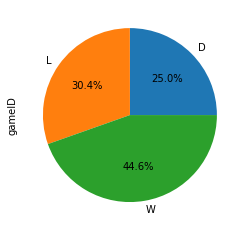

In [91]:
df_f_game.groupby(['result_home'])['gameID'].count().plot(kind = "pie",autopct='%1.1f%%')

In [92]:
df_f_game["totalGoals"]= df_f_game["homeGoals"]  + df_f_game["awayGoals"]
df_f_game["goal_diff"]= abs(df_f_game["homeGoals"]  - df_f_game["awayGoals"])

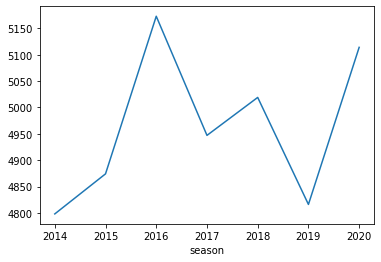

In [93]:
df_f_game.groupby(['season'])['totalGoals'].sum().plot()

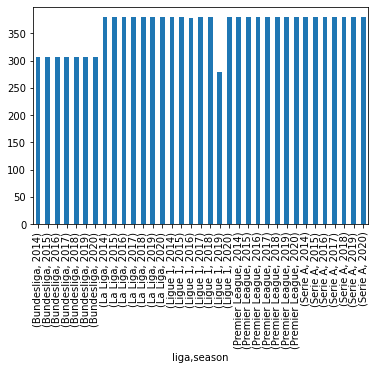

In [94]:
df_f_game.groupby(['liga','season'])['gameID'].count().plot(kind='bar')

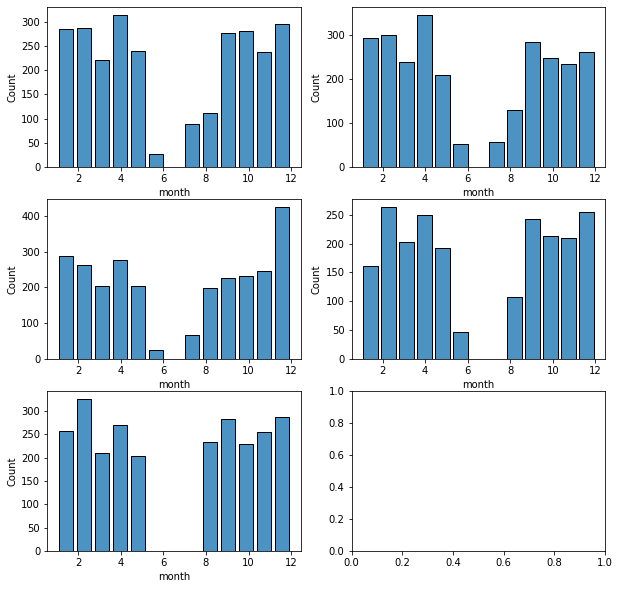

In [95]:
df_f_game_seriea=df_f_game.loc[df_f_game['liga']=="Serie A"]
df_f_game_laliga=df_f_game.loc[df_f_game['liga']=="La Liga"]
df_f_game_premier=df_f_game.loc[df_f_game['liga']=="Premier League"]
df_f_game_bundesliga=df_f_game.loc[df_f_game['liga']=="Bundesliga"]
df_f_game_ligue1=df_f_game.loc[df_f_game['liga']=="Ligue 1"]

figure, axis = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=df_f_game_seriea, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,0])
sns.histplot(data=df_f_game_laliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,1])
sns.histplot(data=df_f_game_premier, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,0])
sns.histplot(data=df_f_game_bundesliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,1])
sns.histplot(data=df_f_game_ligue1, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[2,0])


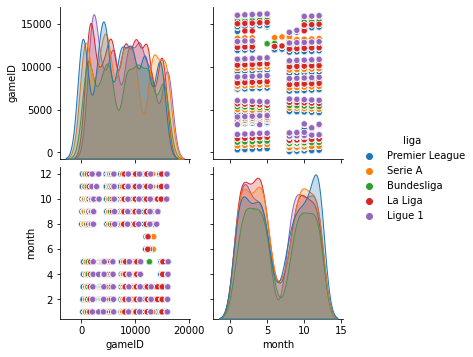

In [96]:
data=df_f_game.loc[:,["gameID","month","liga"]]
sns.pairplot(data=data, hue="liga")


## Mergeamos las tablas de df_apperances,df_shots y df_players

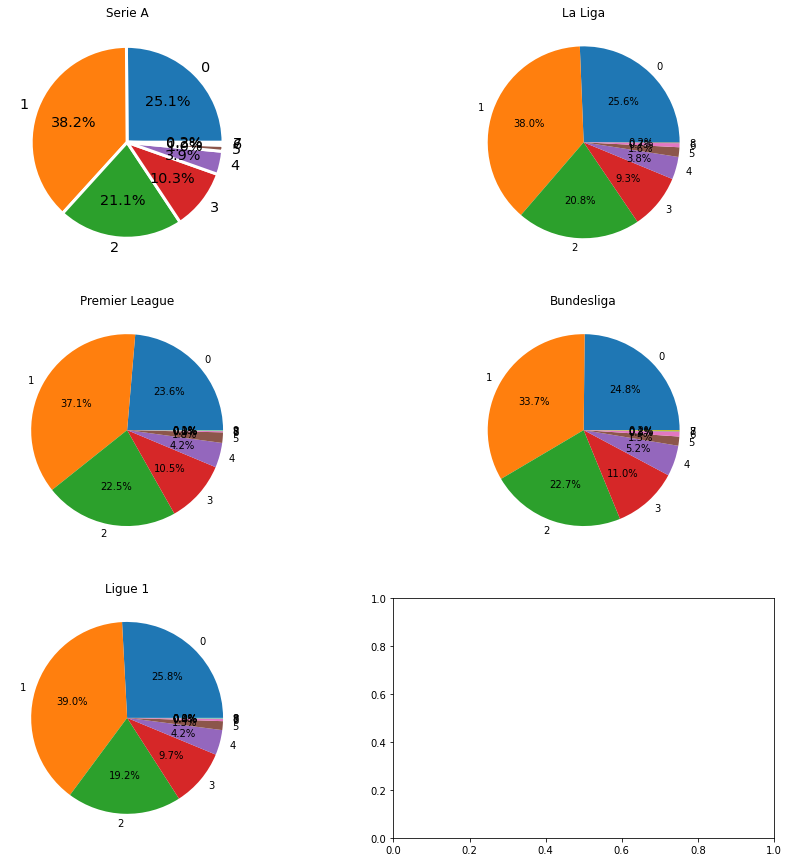

In [97]:

x_seriea=df_f_game_seriea.groupby(['goal_diff'])['gameID']
x_laliga=df_f_game_laliga.groupby(['goal_diff'])['gameID']
x_premier=df_f_game_premier.groupby(['goal_diff'])['gameID']
x_bundesliga=df_f_game_bundesliga.groupby(['goal_diff'])['gameID']
x_ligue1=df_f_game_ligue1.groupby(['goal_diff'])['gameID']



fig, ax = plt.subplots(3, 2, figsize=(15, 15))


ax[0,0].pie(x_seriea.count(),labels= x_seriea.groups.keys(), autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})
ax[0,1].pie(x_laliga.count(),labels= x_laliga.groups.keys(), autopct='%.1f%%')
ax[1,0].pie(x_premier.count(),labels= x_premier.groups.keys(), autopct='%.1f%%')
ax[1,1].pie(x_bundesliga.count(),labels= x_bundesliga.groups.keys(), autopct='%.1f%%')
ax[2,0].pie(x_ligue1.count(),labels= x_ligue1.groups.keys(), autopct='%.1f%%')
ax[0,0].set_title('Serie A')
ax[0,1].set_title('La Liga')
ax[1,0].set_title('Premier League')
ax[1,1].set_title('Bundesliga')
ax[2,0].set_title('Ligue 1')
plt.show()

In [98]:
# df_appearances = pd.read_csv("appearances.csv")
# df_players = pd.read_csv("players.csv", encoding="ISO-8859-1")
# df_shots = pd.read_csv("shots.csv")

df_apperance_merged_with_players = pd.merge(
    df_appearances, df_players, on="playerID"
)


In [99]:
#df2_appearances = pd.read_csv("players/appearances.csv")
#df2_club_games = pd.read_csv("players/club_games.csv")
#df2_clubs = pd.read_csv("players/clubs.csv")
#df2_competitions = pd.read_csv("players/competitions.csv")
#df2_games = pd.read_csv("players/games.csv")
#df2_player_val= pd.read_csv("players/player_valuations.csv")
#df2_players = pd.read_csv("players/players.csv")
#df2_players.info()

df2_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players/appearances.csv")
df2_club_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players/club_games.csv")
df2_clubs = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players/clubs.csv")
df2_competitions = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players/competitions.csv")
df2_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players/games.csv")
df2_player_val= pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players/player_valuations.csv")
df2_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players/players.csv")



In [100]:
top_5_ligas=df2_competitions.loc[(df2_competitions['pretty_name']=='Bundesliga') | (df2_competitions['pretty_name']=='Laliga') | (df2_competitions['pretty_name']=='Premier League') | (df2_competitions['pretty_name']=='Serie A') | (df2_competitions['pretty_name']=='Ligue 1') ]

In [101]:
!pip install thefuzz




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
!pip install rapidfuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
pd.options.mode.chained_assignment = None  # default='warn'


   # See note below
top_5_ligas['new_id'] = df_leagues.loc[top_5_ligas["name"].map(lambda x: process.extractOne(x, df_leagues.name)[2]).values,'leagueID'].values

In [104]:
seasons=df_f_game["season"].unique()
df_f_game[['date','hour']]=df_f_game['date'].str.split(' ',1,expand=True)

df2_games= df2_games[df2_games['season'].isin(seasons)].reset_index()
df2_games_top5= df2_games[df2_games['competition_id'].isin(top_5_ligas['competition_id'])].reset_index()

df2_appearances_top5= df2_appearances[df2_appearances['game_id'].isin(df2_games_top5['game_id'])].reset_index()

df2_clubs_top5=df2_clubs[df2_clubs['domestic_competition_id'].isin(top_5_ligas['competition_id'])].reset_index()

df2_players_top5=df2_players[df2_players['current_club_id'].isin(df2_clubs_top5['club_id'])].reset_index()

df2_players_val_top5=df2_player_val[df2_player_val['player_id'].isin(df2_players_top5['player_id'])].reset_index()




In [160]:
from thefuzz import process, fuzz

def match(x,df,score):
  match=process.extractOne(x, df,score_cutoff=score,scorer=fuzz.partial_ratio)
  if match:
    return match[2]
  else:
    return 2

df2_clubs_top5['new_id'] = df_teams.loc[df2_clubs_top5["pretty_name"].map(lambda x: match(x,df_teams.name,70) ).values,"name"].values

In [161]:
df2_clubs_top5

,index,club_id,name,pretty_name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,url,new_id
0,0,1032,fc-reading,Fc Reading,GB1,33.66,26,25.9,12,46.2,6,Select Car Leasing Stadium,24161,+£8.37m,Brian McDermott,https://www.transfermarkt.co.uk/fc-reading/sta...,Southampton
1,2,1387,acn-siena-1904,Acn Siena 1904,IT1,4.32,30,26.2,6,20.0,2,Artemio Franchi,15373,£-6Th.,Serse Cosmi,https://www.transfermarkt.co.uk/acn-siena-1904...,Southampton
2,3,1071,wigan-athletic,Wigan Athletic,GB1,12.38,29,26.5,14,48.3,6,DW Stadium,25133,£-140Th.,Roberto Martínez,https://www.transfermarkt.co.uk/wigan-athletic...,Athletic Club
3,5,142,real-saragossa,Real Saragossa,ES1,22.86,24,26.6,5,20.8,0,La Romareda,33068,+-0,Manolo Jiménez,https://www.transfermarkt.co.uk/real-saragossa...,Southampton
4,9,23,eintracht-braunschweig,Eintracht Braunschweig,L1,6.48,27,24.9,3,11.1,0,EINTRACHT-Stadion,23325,+-0,Torsten Lieberknecht,https://www.transfermarkt.co.uk/eintracht-brau...,Inter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,357,1041,olympique-lyon,Olympique Lyon,FR1,NaN,27,25.0,9,33.3,3,Groupama Stadium,59186,+€36.90m,Laurent Blanc,https://www.transfermarkt.co.uk/olympique-lyon...,Lyon
162,360,826,rc-lens,Rc Lens,FR1,NaN,25,25.4,16,64.0,11,Stade Bollaert-Delelis,38223,+€19.94m,Franck Haise,https://www.transfermarkt.co.uk/rc-lens/starts...,Lens
163,365,1082,losc-lille,Losc Lille,FR1,NaN,25,24.9,16,64.0,9,Decathlon Arena-Stade Pierre-Mauroy,50186,+€73.50m,Paulo Fonseca,https://www.transfermarkt.co.uk/losc-lille/sta...,Lille
164,367,583,fc-paris-saint-germain,Fc Paris Saint Germain,FR1,NaN,28,25.4,18,64.3,15,Parc des Princes,49691,€-93.20m,Christophe Galtier,https://www.transfermarkt.co.uk/fc-paris-saint...,Paris Saint Germain


In [144]:
df_teams.loc[df_teams["teamID"]==50]

,teamID,name


In [108]:
df2_clubs_top5.pretty_name

0                  Fc Reading
1              Acn Siena 1904
2              Wigan Athletic
3              Real Saragossa
4      Eintracht Braunschweig
                ...          
161            Olympique Lyon
162                   Rc Lens
163                Losc Lille
164    Fc Paris Saint Germain
165                Fc Lorient
Name: pretty_name, Length: 166, dtype: object

In [113]:
lista1=("dfasdf","sdf","#$3","fsadfd","asdfa","#sdf","asdfddd","asdfasdf")
lista2=("dfasdf","sdf","#$3","fsadfd","asdfa","#sdf","asdfddd","asdfasdf")

match = df_teams.loc[df2_clubs_top5["pretty_name"].map(lambda x: match(x,df_teams.name,95) ).values,'teamID'].values

('s', 90)